In [87]:
import sklearn 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn import svm
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_predict
from sklearn.metrics import r2_score 


from sklearn.neural_network import MLPClassifier
from collections import Counter
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
# tuning parameters for decision tree
from sklearn.metrics import roc_curve, auc
from imblearn.under_sampling import TomekLinks 

<AxesSubplot:>

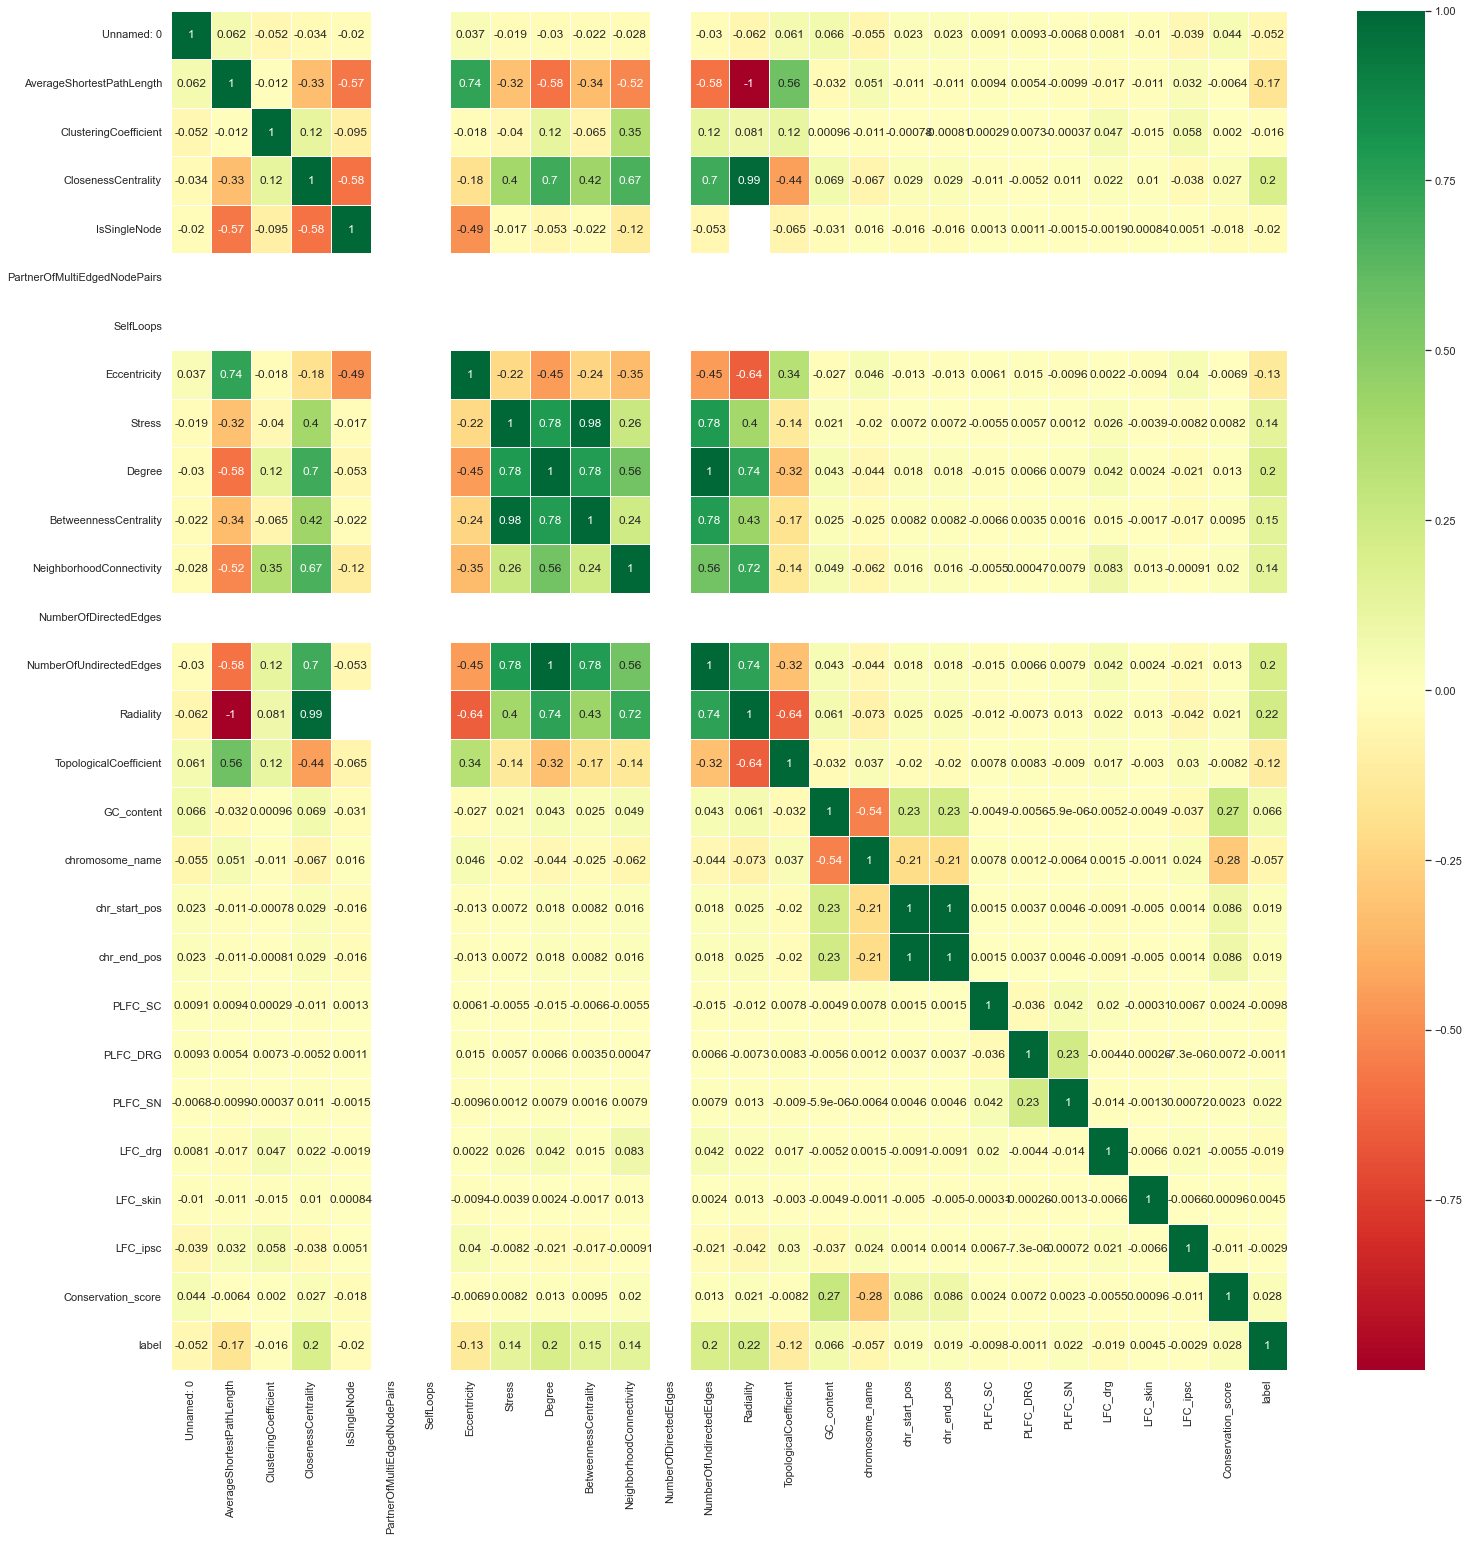

In [7]:
plt.figure(figsize=(25, 25))
color = 'RdYlGn'
sns.heatmap(data.corr(),annot=True, linewidth=.5, cmap=color)

In [11]:
# highly correlated features 

# eccentricity, AverageShortestPathLength
# TopologicalCoefficient and AverageShortestPathLength
# Radiality and ClosenessCentrality
# NumberOfUndirectedEdges and ClosenessCentrality
# ClosenessCentrality and degree
# NeighborhoodConnectivity and ClosenessCentrality
# chromosome end point and start point 

In [ ]:
# The Random Forest, Adaptive Regression Splines and Naive Bayes machine learning models 

In [80]:
# data = pd.read_csv("~/Desktop/all_data.csv")
data = pd.read_csv("~/Desktop/top_data.csv")

## Exploratory Data Analysis 

In [81]:
data.describe()

,Unnamed: 0,AverageShortestPathLength,ClusteringCoefficient,ClosenessCentrality,IsSingleNode,PartnerOfMultiEdgedNodePairs,SelfLoops,Eccentricity,Stress,Degree,...,chr_start_pos,chr_end_pos,PLFC_SC,PLFC_DRG,PLFC_SN,LFC_drg,LFC_skin,LFC_ipsc,Conservation_score,label
count,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.0,18184.0,18184.000000,1.818400e+04,18184.000000,...,1.818400e+04,1.818400e+04,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000
mean,9092.500000,2.810491,0.201610,0.355820,1.003575,0.0,0.0,4.617686,2.080149e+06,92.369886,...,7.038273e+07,7.045048e+07,-0.000319,-0.001145,0.002709,0.003099,-0.000750,-0.083969,0.094080,0.038165
std,5249.412983,0.295203,0.127419,0.036783,0.059682,0.0,0.0,0.562937,7.295070e+06,103.688205,...,5.676698e+07,5.677785e+07,0.014435,0.062076,0.108164,0.586089,0.053694,0.432762,0.064959,0.191601
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,-0.739000,-1.661000,-1.640000,-4.811047,-2.484435,-5.304283,0.000000,0.000000
25%,4546.750000,2.666795,0.111111,0.338854,1.000000,0.0,0.0,4.000000,2.265990e+05,31.000000,...,2.703032e+07,2.708545e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.057176,0.000000
50%,9092.500000,2.810548,0.176471,0.355558,1.000000,0.0,0.0,5.000000,6.454190e+05,61.000000,...,5.525910e+07,5.531914e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.089524,0.000000
75%,13638.250000,2.948780,0.260418,0.374633,1.000000,0.0,0.0,5.000000,1.744188e+06,115.000000,...,1.077088e+08,1.077768e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.124498,0.000000
max,18184.000000,4.392317,1.000000,0.496669,2.000000,0.0,0.0,6.000000,3.211772e+08,1808.000000,...,2.489062e+08,2.489199e+08,0.360000,0.842000,2.746000,7.748629,2.573436,9.449046,0.881398,1.000000


In [93]:
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(data[['cellular_comp']])
print('Encoded data:\n', np.array(X_encoded))

data['cellular_comp'] = X_encoded

Encoded data:
 [[10.]
 [10.]
 [16.]
 ...
 [ 2.]
 [13.]
 [13.]]


(array([2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 4.000e+00,
        6.000e+00, 4.000e+00, 1.000e+01, 2.900e+01, 6.200e+01, 9.800e+01,
        6.200e+01, 1.761e+04, 1.510e+02, 8.800e+01, 3.500e+01, 1.000e+01,
        4.000e+00, 2.000e+00]),
 array([-1.661  , -1.53585, -1.4107 , -1.28555, -1.1604 , -1.03525,
        -0.9101 , -0.78495, -0.6598 , -0.53465, -0.4095 , -0.28435,
        -0.1592 , -0.03405,  0.0911 ,  0.21625,  0.3414 ,  0.46655,
         0.5917 ,  0.71685,  0.842  ]),
 <BarContainer object of 20 artists>)

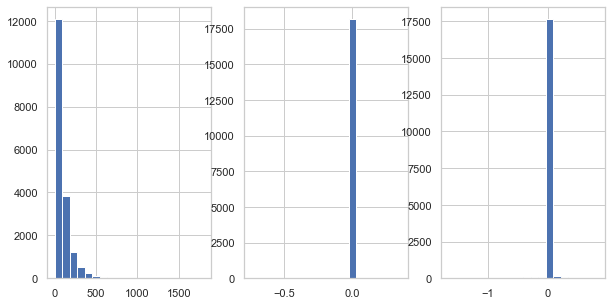

In [86]:
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

# Plot a histogram on each subplot
axes[0].hist(data['Degree'], bins=20)
axes[1].hist(data['PLFC_SC'], bins=20)
axes[2].hist(data['PLFC_DRG'], bins=20)

In [95]:
data.columns

Index(['Unnamed: 0', 'symbol', 'ID', 'AverageShortestPathLength',
       'ClusteringCoefficient', 'ClosenessCentrality', 'IsSingleNode',
       'PartnerOfMultiEdgedNodePairs', 'SelfLoops', 'Eccentricity', 'Stress',
       'Degree', 'BetweennessCentrality', 'NeighborhoodConnectivity',
       'NumberOfDirectedEdges', 'NumberOfUndirectedEdges', 'Radiality',
       'TopologicalCoefficient', 'cellular_comp', 'GC_content',
       'chromosome_name', 'chr_start_pos', 'chr_end_pos', 'PLFC_SC',
       'PLFC_DRG', 'PLFC_SN', 'GO_vector', 'LFC_drg', 'LFC_skin', 'LFC_ipsc',
       'Conservation_score', 'label'],
      dtype='object')

In [96]:
# drop columns 
df = data.drop(['Unnamed: 0', 'symbol', 'ID', "IsSingleNode",
                'PartnerOfMultiEdgedNodePairs', 
                'SelfLoops', 'NumberOfDirectedEdges', 
               'chr_start_pos', 'chr_end_pos'],axis = 1)




In [62]:
display(df)

,AverageShortestPathLength,ClusteringCoefficient,ClosenessCentrality,Eccentricity,Stress,Degree,BetweennessCentrality,NeighborhoodConnectivity,NumberOfUndirectedEdges,Radiality,...,chr_end_pos,PLFC_SC,PLFC_DRG,PLFC_SN,GO_vector,LFC_drg,LFC_skin,LFC_ipsc,Conservation_score,label
0,2.741141,0.317103,0.364812,4,1201990,71,0.000060,243.915493,71,0.999037,...,55074557.0,0.0,0.000,0.0,0000000000000000000000000110000000000000000000...,0.000000,0.0,0.000000,0.106428,0
1,2.582404,0.233373,0.387236,4,3298502,185,0.000136,231.232432,185,0.999125,...,12541549.0,0.0,0.000,0.0,0000000000000000000000000000000000000000001000...,0.927060,0.0,0.000000,0.065339,0
2,2.899161,0.153846,0.344927,5,489422,40,0.000038,105.625000,40,0.998950,...,19378193.0,0.0,0.000,0.0,0000100110000000000011100000000000000000001101...,0.000000,0.0,0.000000,0.130655,0
3,2.974445,0.156989,0.336197,5,208392,31,0.000021,86.129032,31,0.998908,...,44865666.0,0.0,0.000,0.0,0000000000000000000100000000000000000000000000...,-2.126374,0.0,0.000000,0.000000,0
4,2.824539,0.101408,0.354040,4,1113422,71,0.000116,88.492958,71,0.998991,...,70354734.0,0.0,0.000,0.0,0000000000000000000001000000000000000000000000...,-1.313771,0.0,0.000000,0.070893,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18179,2.923998,0.339902,0.341998,5,194798,29,0.000016,153.206900,29,0.998936,...,154450654.0,0.0,0.000,0.0,0000000000000000000000000000000000000000000000...,0.000000,0.0,0.000000,0.094780,0
18180,2.818137,0.138039,0.354844,5,962138,51,0.000068,140.529400,51,0.998994,...,2529177.0,0.0,0.000,0.0,0000000000000000000000000000000000000000000000...,-0.257502,0.0,-0.784598,0.057839,0
18181,2.557236,0.158074,0.391047,4,2468928,131,0.000130,248.877900,131,0.999139,...,42155820.0,0.0,-0.503,0.0,0000000000000000000000010000000000000000000000...,0.248134,0.0,0.000000,0.161909,0
18182,2.911911,0.070588,0.343417,5,1332768,35,0.000127,90.857140,35,0.998942,...,42574382.0,0.0,0.000,0.0,0000000000000000000000000000000000000000000000...,0.000000,0.0,0.000000,0.092805,0


In [36]:
df['cellular_comp']

0        000000000010000000000
1        000000000010000000000
2        000000000000000010000
3        001000000000000000000
4        000000000100000000000
                 ...          
18179    000000001000000000000
18180    000000000000010000000
18181    001000000000000000000
18182    000000000000010000000
18183    000000000000010000000
Name: cellular_comp, Length: 18184, dtype: object

In [3]:
# pg = pd.read_csv("~/Desktop/code/GeneCards-SearchResults.csv")

In [105]:
from scipy.stats import chi2_contingency, kruskal
# Create separate DataFrames for categorical and numerical variables
categorical_vars = df.select_dtypes(include='object')
numerical_vars = df.select_dtypes(include=['int', 'float'])

# Loop through each categorical variable and perform the chi-square test
for col in categorical_vars:
    contingency_table = pd.crosstab(df[col], df['label'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    if p < 0.05:  # Check if the p-value is significant
        print(f"{col} is significantly associated with the outcome (p-value = {p:.3f})")

# Loop through each numerical variable and perform the Kruskal-Wallis test
for col in numerical_vars:
    group1 = df[df['label'] == 0][col]
    group2 = df[df['label'] == 1][col]
    stat, p = kruskal(group1, group2)
    if p < 0.05:  # Check if the p-value is significant
        print(f"{col} is significantly associated with the outcome (p-value = {p:.3f})")

GO_vector is significantly associated with the outcome (p-value = 0.000)
Unnamed: 0 is significantly associated with the outcome (p-value = 0.000)
AverageShortestPathLength is significantly associated with the outcome (p-value = 0.000)
ClosenessCentrality is significantly associated with the outcome (p-value = 0.000)
Eccentricity is significantly associated with the outcome (p-value = 0.000)
Stress is significantly associated with the outcome (p-value = 0.000)
Degree is significantly associated with the outcome (p-value = 0.000)
BetweennessCentrality is significantly associated with the outcome (p-value = 0.000)
NeighborhoodConnectivity is significantly associated with the outcome (p-value = 0.000)
NumberOfUndirectedEdges is significantly associated with the outcome (p-value = 0.000)
Radiality is significantly associated with the outcome (p-value = 0.000)
TopologicalCoefficient is significantly associated with the outcome (p-value = 0.000)
GC_content is significantly associated with th

In [98]:
# feature scaling and transformation 
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range = (-1,1))
x = min_max_scaler.fit_transform(x)

In [97]:
# Replace all missing and invalid values with 0
df.fillna(value=0, inplace=True)
df.replace([np.inf, -np.inf], 0, inplace=True)

x = df.values[:,:-1]
y = df.values[:,-1]
y = y.astype('int')


In [102]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE oversampling to balance the classes
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Create a Naive Bayes classifier
nb = GaussianNB()

# Train the classifier on the training data
nb.fit(X_train_resampled, y_train_resampled)

# nb.fit(X_train, y_train)

# Predict the classes of the testing data
y_pred = nb.predict(X_test)

# the probabilities 
proba = nb.predict_proba(X_test)
print(proba)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

# Print the classification report
confusion_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Confusion matrix:\n{confusion_mat}")
print(f"Classification report:\n{report}")

[[3.40162107e-04 9.99659838e-01]
 [1.04619890e-03 9.98953801e-01]
 [2.14167369e-04 9.99785833e-01]
 ...
 [1.46069798e-05 9.99985393e-01]
 [2.98424348e-04 9.99701576e-01]
 [1.53261395e-02 9.84673861e-01]]
Accuracy: 0.3092008797653959
Confusion matrix:
[[1503 3745]
 [  24  184]]
Classification report:
              precision    recall  f1-score   support

           0       0.98      0.29      0.44      5248
           1       0.05      0.88      0.09       208

    accuracy                           0.31      5456
   macro avg       0.52      0.59      0.27      5456
weighted avg       0.95      0.31      0.43      5456



In [107]:
probs = pd.DataFrame(proba)
display(probs)

,0,1
0,0.000340,0.999660
1,0.001046,0.998954
2,0.000214,0.999786
3,0.645596,0.354404
4,0.001552,0.998448
...,...,...
5451,0.943826,0.056174
5452,0.000000,1.000000
5453,0.000015,0.999985
5454,0.000298,0.999702


In [110]:
data.columns

Index(['Unnamed: 0', 'symbol', 'ID', 'AverageShortestPathLength',
       'ClusteringCoefficient', 'ClosenessCentrality', 'IsSingleNode',
       'PartnerOfMultiEdgedNodePairs', 'SelfLoops', 'Eccentricity', 'Stress',
       'Degree', 'BetweennessCentrality', 'NeighborhoodConnectivity',
       'NumberOfDirectedEdges', 'NumberOfUndirectedEdges', 'Radiality',
       'TopologicalCoefficient', 'cellular_comp', 'GC_content',
       'chromosome_name', 'chr_start_pos', 'chr_end_pos', 'PLFC_SC',
       'PLFC_DRG', 'PLFC_SN', 'GO_vector', 'LFC_drg', 'LFC_skin', 'LFC_ipsc',
       'Conservation_score', 'label'],
      dtype='object')

In [117]:
# compute the probability of all data, then validate 

nb = GaussianNB()

# Train the classifier on the training data
nb.fit(X_train_resampled, y_train_resampled)

# the probabilities 
proba = nb.predict_proba(x)
probs = pd.DataFrame(proba)
probs['symbol'] = data['symbol']

probs = probs.sort_values(by=1,ascending=False )
display(probs)


probs.to_csv('~/Desktop/my_data.csv', index=False)

,0,1,symbol
198,0.000000e+00,1.0,ACTB
2687,4.162476e-41,1.0,CDH1
14705,7.902488e-69,1.0,SP8
2717,4.451308e-30,1.0,CDK1
3790,9.066428e-22,1.0,CYCS
...,...,...,...
1746,1.000000e+00,0.0,C17orf100
6095,1.000000e+00,0.0,GFM1
1738,1.000000e+00,0.0,C16orf86
3653,1.000000e+00,0.0,CTAGE9


In [70]:
# cluster visualization using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

In [76]:
display(df)

,AverageShortestPathLength,ClusteringCoefficient,ClosenessCentrality,Eccentricity,Stress,Degree,BetweennessCentrality,NeighborhoodConnectivity,NumberOfUndirectedEdges,Radiality,...,chr_end_pos,PLFC_SC,PLFC_DRG,PLFC_SN,GO_vector,LFC_drg,LFC_skin,LFC_ipsc,Conservation_score,label
0,2.741141,0.317103,0.364812,4,1201990,71,0.000060,243.915493,71,0.999037,...,55074557.0,0.0,0.000,0.0,0000000000000000000000000110000000000000000000...,0.000000,0.0,0.000000,0.106428,0
1,2.582404,0.233373,0.387236,4,3298502,185,0.000136,231.232432,185,0.999125,...,12541549.0,0.0,0.000,0.0,0000000000000000000000000000000000000000001000...,0.927060,0.0,0.000000,0.065339,0
2,2.899161,0.153846,0.344927,5,489422,40,0.000038,105.625000,40,0.998950,...,19378193.0,0.0,0.000,0.0,0000100110000000000011100000000000000000001101...,0.000000,0.0,0.000000,0.130655,0
3,2.974445,0.156989,0.336197,5,208392,31,0.000021,86.129032,31,0.998908,...,44865666.0,0.0,0.000,0.0,0000000000000000000100000000000000000000000000...,-2.126374,0.0,0.000000,0.000000,0
4,2.824539,0.101408,0.354040,4,1113422,71,0.000116,88.492958,71,0.998991,...,70354734.0,0.0,0.000,0.0,0000000000000000000001000000000000000000000000...,-1.313771,0.0,0.000000,0.070893,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18179,2.923998,0.339902,0.341998,5,194798,29,0.000016,153.206900,29,0.998936,...,154450654.0,0.0,0.000,0.0,0000000000000000000000000000000000000000000000...,0.000000,0.0,0.000000,0.094780,0
18180,2.818137,0.138039,0.354844,5,962138,51,0.000068,140.529400,51,0.998994,...,2529177.0,0.0,0.000,0.0,0000000000000000000000000000000000000000000000...,-0.257502,0.0,-0.784598,0.057839,0
18181,2.557236,0.158074,0.391047,4,2468928,131,0.000130,248.877900,131,0.999139,...,42155820.0,0.0,-0.503,0.0,0000000000000000000000010000000000000000000000...,0.248134,0.0,0.000000,0.161909,0
18182,2.911911,0.070588,0.343417,5,1332768,35,0.000127,90.857140,35,0.998942,...,42574382.0,0.0,0.000,0.0,0000000000000000000000000000000000000000000000...,0.000000,0.0,0.000000,0.092805,0


In [75]:
x

array([[2.74114140633624, 0.317102615694165, 0.364811533505155, ..., 0.0,
        0.0, 0.106427873656789],
       [2.58240423887846, 0.23337250293772, 0.387236043429939, ..., 0.0,
        0.0, 0.0653392382019325],
       [2.89916105530412, 0.153846153846154, 0.344927370685552, ..., 0.0,
        0.0, 0.130655121339866],
       ...,
       [2.557236, 0.158074, 0.3910472, ..., 0.0, 0.0, 0.1619087],
       [2.911911, 0.07058824, 0.3434171, ..., 0.0, 0.0, 0.0928052],
       [2.844133, 0.2132238, 0.351601, ..., 0.0, -1.236588, 0.09113633]],
      dtype=object)

In [71]:
finalDf = pd.concat([principalDf, df['label']], axis = 1)

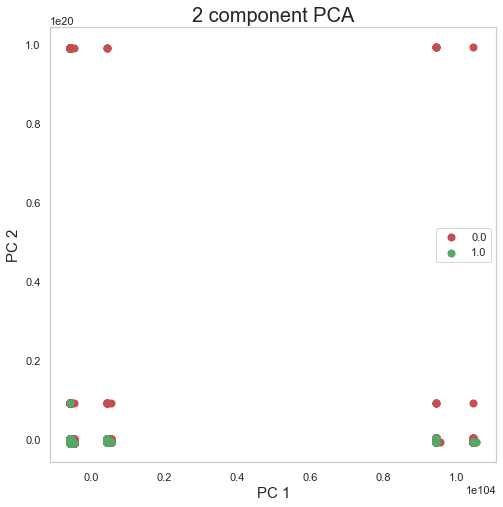

In [72]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0.0,1.0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], finalDf.loc[indicesToKeep, 'PC2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

In [111]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# Create an instance of the SVM classifier
svc = SVC(kernel="linear", C=1)

# Create a recursive feature eliminator with cross-validation
rfe = RFE(estimator=svc, n_features_to_select=10, step=1)

# Fit the feature eliminator to the data
rfe.fit(x, y)

# Print the indices of the selected features
print(rfe.support_)

# Print the rank of each feature
print(rfe.ranking_)

[ True False  True  True  True False  True False  True  True  True False
 False False  True  True False False False False False False False False]
[ 1 15  1  1  1  2  1  3  1  1  1 13 10 14  1  1  9  7  6  4 11  8 12  5]


In [ ]:
# selected 10 features 
selected = rfe.ranking_[:5]

X_new = x[:,selected]
X_new.shape

In [112]:
# get train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

# Apply SMOTE oversampling to balance the classes
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

class_weight = {0: 1, 1: 100}  # Class 0 has weight 1, class 1 has weight 10

# Train a random forest classifier
rfc = RandomForestClassifier(n_estimators=200, random_state=42, class_weight = class_weight)
rfc.fit(X_train_resampled, y_train_resampled)


# Test the model on the testing set
y_pred = rfc.predict(X_test)

# Print the classification report
confusion_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Confusion matrix:\n{confusion_mat}")
print(f"Classification report:\n{report}")

Confusion matrix:
[[4356  510]
 [ 421  149]]
Classification report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      4866
           1       0.23      0.26      0.24       570

    accuracy                           0.83      5436
   macro avg       0.57      0.58      0.57      5436
weighted avg       0.84      0.83      0.83      5436



In [69]:
# Train a logistic regression classifier on the resampled data
clf = LogisticRegression(random_state=0)
clf.fit(X_train_resampled, y_train_resampled)

# Get the probability scores for the first 5 samples
proba_scores = clf.predict_proba(X_train_resampled)

# Print the probability scores
print(proba_scores)

# Make predictions on the test data
y_pred = clf.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the classification report
print(classification_report(y_test, y_pred))
print(f"Confusion matrix:\n{confusion_mat}")

[[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 ...
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5248
           1       0.00      0.00      0.00       208

    accuracy                           0.96      5456
   macro avg       0.48      0.50      0.49      5456
weighted avg       0.93      0.96      0.94      5456

Confusion matrix:
[[5248    0]
 [ 208    0]]


In [116]:
# convert the prob scores to a ranking? 
probs = pd.DataFrame(proba_scores)

In [117]:
len(probs)

22704

In [118]:
len(df)

18119

In [77]:
print(rfc.feature_importances_)

[0.02768518 0.07992936 0.02967676 0.00595704 0.04533113 0.03638807
 0.04448849 0.07061469 0.03647317 0.02771974 0.04908741 0.05525947
 0.09409835 0.0455524  0.07116734 0.07414504 0.0014236  0.01707962
 0.01803878 0.03024285 0.03208108 0.0004387  0.04644029 0.06068142]


In [ ]:
model = RandomForestClassifier(n_estimators=200, class_weight='balanced_subsample')
y_pred = cross_val_predict(model, X, y, cv=10)


In [90]:
# tune parameters for mlpc using gridsearch  
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

X = X_train
y = y_train
y = y.astype('int')

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X, y) # X is train samples and y is the corresponding labels

print('Best parameters found:\n', clf.best_params_)

/Users/lynnezhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynnezhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynnezhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynnezhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/l

/Users/lynnezhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynnezhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynnezhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynnezhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/l

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'sgd'}
